In [15]:
import numpy as np
import pandas as pd
import sklearn as sk
import random
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_regression
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics, datasets
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.externals import joblib

In [16]:
data = pd.read_csv("new1.csv")

l1=("Adventure","Comedy","Action","Drama","Crime","Thriller","Horror","Animation","Biography","Sci-Fi","Musical","Family","Fantasy","Mystery","War","Romance","Western")
l2=("Argentina","Australia","Belgium","Canada","Chile","Czech Republic","Ireland","Panama","China","Denmark","France","Germany","Hong Kong","Hungary","Iran","Isreal","Italy","Japan","Netherlands","New Zealand","Peru","South Africa","Spain","Sweden","Switzerland","UK","USA","West Germany")
l3=("R","PG-13","PG","UNRATED","G","NC-17","TV-PG","TV-MA","B","B15","TV-14")

def score_to_numeric1(x):
    for j in range(len(l1)):
         if(x==l1[j]):
            return j
        
def score_to_numeric2(x):
    for j in range(len(l2)):
         if(x==l2[j]):
            return j  
        
def score_to_numeric3(x):
    for j in range(len(l3)):
         if(x==l3[j]):
            return j
         else:
            return 3
        
data['genre'] = data['genre'].apply(score_to_numeric1)
data['country'] = data['country'].apply(score_to_numeric2)
data['rating'] = data['rating'].apply(score_to_numeric3)

data = data[np.isfinite(data['genre'])]
data = data[np.isfinite(data['country'])]
data = data[np.isfinite(data['rating'])]

X = data.drop(['sr','gross','company','director','name','released','star','writer'],axis=1)
#Normalizer().fit(X)
#print(X.shape)
Y=data['gross']       
Y = Y.values#.reshape(-1, 1)##convert 1 col to 2d matrix with replace

for i in range(Y.size):
    if(Y[i]<30000000.00):
        Y[i]=1
    else:
        Y[i]=2
        
        
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, shuffle=True)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5332, 9) (5332,)
(1334, 9) (1334,)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
Coefficients =  [[ 5.43425633e-08 -1.63842538e-05 -2.32547556e-06 -6.47596092e-07
  -7.89154940e-05 -4.88982954e-06  1.30507421e-05 -1.55105501e-03
  -4.79168321e-06]]
Intercept =  [-7.76170878e-07]
Training Accuracy 0.8317704426106527
Training Confusion = [[3360  678]
 [ 219 1075]]
              precision    recall  f1-score   support

           1       0.83      0.94      0.88      3579
           2       0.83      0.61      0.71      1753

   micro avg       0.83      0.83      0.83      5332
   macro avg       0.83      0.78      0.79      5332
weighted avg       0.83      0.83      0.82      5332

Test Accuracy 0.8388305847076462
Test Confusion = [[843 150]
 [ 65 276]]
              precision    recall  f1-score   

['lrweight.joblib']

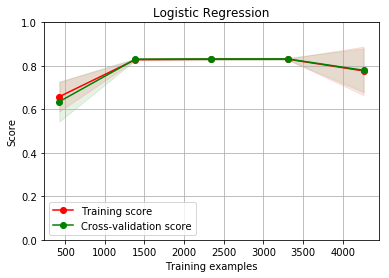

In [18]:
##LOGISTIC REGRESSION MODEL
lr = LogisticRegression(C=1e5,solver='lbfgs')
lr.fit(x_train, y_train)
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

print(lr)
print('Coefficients = ', lr.coef_)
print('Intercept = ', lr.intercept_)

print('Training Accuracy {}'.format(lr.score(x_train, y_train)))
print('Training Confusion = {}'.format(metrics.confusion_matrix(y_pred_train, y_train)))
print(classification_report(y_train, y_pred_train))
print('Test Accuracy {}'.format(lr.score(x_test, y_test)))
print('Test Confusion = {}'.format(metrics.confusion_matrix(y_pred_test, y_test)))
print(classification_report(y_test, y_pred_test))
title = "Learning Curve LR"
plot_learning_curve(lr,"Logistic Regression", x_train, y_train, ylim=(0,1),cv=5)
#saving the weights
joblib.dump(lr,'lrweight.joblib')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Training Accuracy 1.0
Training Confusion = [[3579    0]
 [   0 1753]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3579
           2       1.00      1.00      1.00      1753

   micro avg       1.00      1.00      1.00      5332
   macro avg       1.00      1.00      1.00      5332
weighted avg       1.00      1.00      1.00      5332

Test Accuracy 0.8260869565217391
Test Confusion = [[793 117]
 [115 309]]
              precision    recall  f1-score   support

           1       0.87      0.87      0.87       908
           2       0.73      0.73      0.73       426

   micro avg    

['dtweight.joblib']

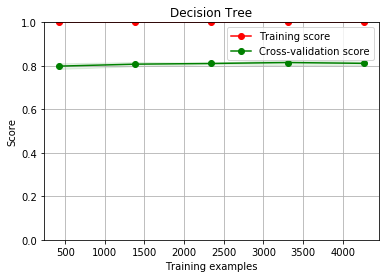

In [19]:
##DECISION TREE MODEL
clfdt = tree.DecisionTreeClassifier(criterion='gini', splitter='best')
clfdt.fit(x_train, y_train)
y_pred_train = clfdt.predict(x_train)
y_pred_test = clfdt.predict(x_test)
print(clfdt)

#dot_data = tree.export_graphviz(clfdt, out_file=None, feature_names=['sepal_length','sepal_width','petal_length','petal_width'],class_names=['setosa','versicolor','virginica'], filled=True, rounded=True, special_characters=True)
#graph = graphviz.Source(dot_data)
#graph.render("movie-train")
print('Training Accuracy {}'.format(clfdt.score(x_train, y_train)))
print('Training Confusion = {}'.format(metrics.confusion_matrix(y_pred_train, y_train, [1,2])))
print(classification_report(y_train, y_pred_train))
print('========================================================')
print('Test Accuracy {}'.format(clfdt.score(x_test, y_test)))
print('Test Confusion = {}'.format(metrics.confusion_matrix(y_pred_test, y_test), [1,2]))
print(classification_report(y_test, y_pred_test))
title = "Learning Curve DT"
plot_learning_curve(clfdt,"Decision Tree", x_train, y_train, ylim=(0,1),cv=5)
#saving the weights
joblib.dump(clfdt,'dtweight.joblib')

/Users/Swayamprava/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Swayamprava/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=5000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Training Accuracy 0.5005626406601651
Training Confusion = [[1013   97]
 [2566 1656]]
              precision    recall  f1-score   support

           1       0.91      0.28      0.43      3579
           2       0.39      0.94      0.55      1753

   micro avg       0.50      0.50      0.50      5332
   macro avg       0.65      0.61      0.49      5332
weighted avg       0.74      0.50      0.47      5332

Test Accuracy 0.5022488755622189
Test Confusion = [[272  28]
 [636 398]]
              precision    recall  f1-score   support

           1       0.91      0.30      0.45       908
           2       0.38      0.93      0.55       426

   micro avg       0.50      0.50      0.50      1334
   macro avg       0.65      0.62      0.50      1334
weighted avg       0.74     

/Users/Swayamprava/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Swayamprava/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Swayamprava/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Swayamprava/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Swayamprava/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to conver

<module 'matplotlib.pyplot' from '/Users/Swayamprava/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

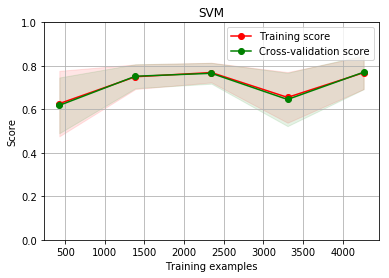

In [20]:
svc = LinearSVC(max_iter=5000)
svc.fit(x_train, y_train)
y_pred_train = svc.predict(x_train)
y_pred_test = svc.predict(x_test)

print(svc)

print('Training Accuracy {}'.format(svc.score(x_train, y_train)))
print('Training Confusion = {}'.format(metrics.confusion_matrix(y_pred_train, y_train, [1,2])))
print(classification_report(y_train, y_pred_train))
print('========================================================')
print('Test Accuracy {}'.format(svc.score(x_test, y_test)))
print('Test Confusion = {}'.format(metrics.confusion_matrix(y_pred_test, y_test, [1,2])))
print(classification_report(y_test, y_pred_test))
plot_learning_curve(svc,"SVM", x_train, y_train, ylim=(0,1),cv=5)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Training Accuracy 0.6972993248312078
Training Confusion = [[3362 1413]
 [ 201  356]]
              precision    recall  f1-score   support

           1       0.70      0.94      0.81      3563
           2       0.64      0.20      0.31      1769

   micro avg       0.70      0.70      0.70      5332
   macro avg       0.67      0.57      0.56      5332
weighted avg       0.68      0.70      0.64      5332

Test Accuracy 0.7091454272863568
Test Confusion = [[872 336]
 [ 52  74]]
              precision    recall  f1-score   support

     

['nnwt.joblib']

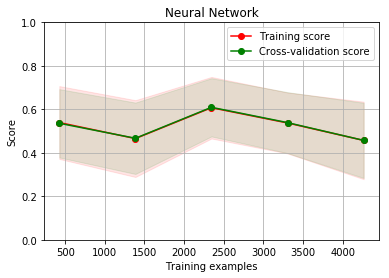

In [431]:
##NEURAL NETWORK MODEL
NN=MLPClassifier().fit(x_train,y_train)
#hidden_layer_sizes=(4,3), activation='relu',solver='adam',alpha=0.001
y_pred_train = NN.predict(x_train)
y_pred_test = NN.predict(x_test)
print(NN)
print('Training Accuracy {}'.format(NN.score(x_train, y_train)))
print('Training Confusion = {}'.format(metrics.confusion_matrix(y_pred_train, y_train, [1,2])))
print(classification_report(y_train, y_pred_train))
print('========================================================')
print('Test Accuracy {}'.format(NN.score(x_test, y_test)))
print('Test Confusion = {}'.format(metrics.confusion_matrix(y_pred_test, y_test, [1,2])))
print(classification_report(y_test, y_pred_test))
#saving the weights
title = "Learning Curve NN"
plot_learning_curve(NN,"Neural Network", x_train, y_train, ylim=(0,1),cv=5)
joblib.dump(NN,'nnwt.joblib')



Training Accuracy 0.9497374343585896
Training Confusion = [[3451  156]
 [ 112 1613]]
              precision    recall  f1-score   support

           1       0.96      0.97      0.96      3563
           2       0.94      0.91      0.92      1769

   micro avg       0.95      0.95      0.95      5332
   macro avg       0.95      0.94      0.94      5332
weighted avg       0.95      0.95      0.95      5332

Test Accuracy 0.8650674662668666
Test Confusion = [[840  96]
 [ 84 314]]
              precision    recall  f1-score   support

           1       0.90      0.91      0.90       924
           2       0.79      0.77      0.78       410

   micro avg       0.87      0.87      0.87      1334
   macro avg       0.84      0.84      0.84      1334
weighted avg       0.86      0.87      0.86      1334



['rfwt.joblib']

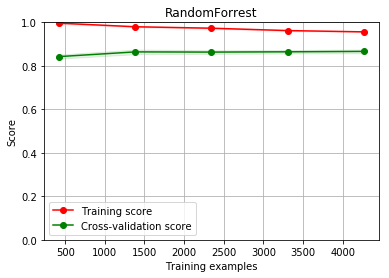

In [433]:
##RANDOMFORREST CLASSIFIER
rf = RandomForestClassifier(max_depth=9, n_estimators=20, max_features=9,criterion='gini').fit(x_train,y_train)
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)
print('Training Accuracy {}'.format(rf.score(x_train, y_train)))
print('Training Confusion = {}'.format(metrics.confusion_matrix(y_pred_train, y_train, [1,2])))
print(classification_report(y_train, y_pred_train))
print('========================================================')
print('Test Accuracy {}'.format(rf.score(x_test, y_test)))
print('Test Confusion = {}'.format(metrics.confusion_matrix(y_pred_test, y_test, [1,2])))
print(classification_report(y_test, y_pred_test))
plot_learning_curve(rf,"RandomForrest", x_train, y_train, ylim=(0,1),cv=5)
joblib.dump(rf,'rfwt.joblib')


Training Accuracy 0.8762190547636909
Training Confusion = [[3284  381]
 [ 279 1388]]
              precision    recall  f1-score   support

           1       0.90      0.92      0.91      3563
           2       0.83      0.78      0.81      1769

   micro avg       0.88      0.88      0.88      5332
   macro avg       0.86      0.85      0.86      5332
weighted avg       0.88      0.88      0.88      5332

Test Accuracy 0.8193403298350824
Test Confusion = [[809 126]
 [115 284]]
              precision    recall  f1-score   support

           1       0.87      0.88      0.87       924
           2       0.71      0.69      0.70       410

   micro avg       0.82      0.82      0.82      1334
   macro avg       0.79      0.78      0.79      1334
weighted avg       0.82      0.82      0.82      1334



['knnwt.joblib']

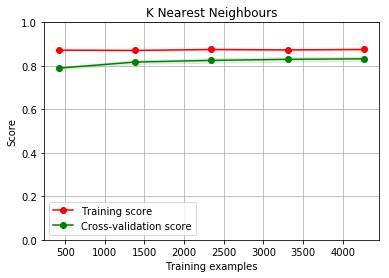

In [434]:
#K-nearest neighbours
knn = KNeighborsClassifier()
knn.fit(x_train,y_train) 
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)
print('Training Accuracy {}'.format(knn.score(x_train, y_train)))
print('Training Confusion = {}'.format(metrics.confusion_matrix(y_pred_train, y_train, [1,2])))
print(classification_report(y_train, y_pred_train))
print('========================================================')
print('Test Accuracy {}'.format(knn.score(x_test, y_test)))
print('Test Confusion = {}'.format(metrics.confusion_matrix(y_pred_test, y_test, [1,2])))
print(classification_report(y_test, y_pred_test))
plot_learning_curve(knn,"K Nearest Neighbours", x_train, y_train, ylim=(0,1),cv=5)
#print(accuracy_score(y_train, , normalize=True, sample_weight=None))
joblib.dump(knn,'knnwt.joblib')

Training Accuracy 1.0
Training Confusion = [[3563    0]
 [   0 1769]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3563
           2       1.00      1.00      1.00      1769

   micro avg       1.00      1.00      1.00      5332
   macro avg       1.00      1.00      1.00      5332
weighted avg       1.00      1.00      1.00      5332

Test Accuracy 0.8740629685157422
Test Confusion = [[851  95]
 [ 73 315]]
              precision    recall  f1-score   support

           1       0.90      0.92      0.91       924
           2       0.81      0.77      0.79       410

   micro avg       0.87      0.87      0.87      1334
   macro avg       0.86      0.84      0.85      1334
weighted avg       0.87      0.87      0.87      1334



['extwt.joblib']

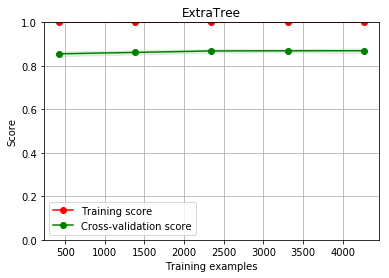

In [435]:
#extratree classifier
ext=ExtraTreesClassifier(n_estimators=100,criterion='gini')
ext.fit(x_train,y_train)
y_pred_train = ext.predict(x_train)
y_pred_test = ext.predict(x_test)
print('Training Accuracy {}'.format(ext.score(x_train, y_train)))
print('Training Confusion = {}'.format(metrics.confusion_matrix(y_pred_train, y_train, [1,2])))
print(classification_report(y_train, y_pred_train))
print('========================================================')
print('Test Accuracy {}'.format(ext.score(x_test, y_test)))
print('Test Confusion = {}'.format(metrics.confusion_matrix(y_pred_test, y_test, [1,2])))
print(classification_report(y_test, y_pred_test))
plot_learning_curve(ext,"ExtraTree", x_train, y_train, ylim=(0,1),cv=5)
#print(accuracy_score(y_train, , normalize=True, sample_weight=None))
joblib.dump(ext,'extwt.joblib')

Training Accuracy 0.8132033008252063
Training Confusion = [[3388  821]
 [ 175  948]]
              precision    recall  f1-score   support

           1       0.80      0.95      0.87      3563
           2       0.84      0.54      0.66      1769

   micro avg       0.81      0.81      0.81      5332
   macro avg       0.82      0.74      0.76      5332
weighted avg       0.82      0.81      0.80      5332

Test Accuracy 0.8223388305847077
Test Confusion = [[874 187]
 [ 50 223]]
              precision    recall  f1-score   support

           1       0.82      0.95      0.88       924
           2       0.82      0.54      0.65       410

   micro avg       0.82      0.82      0.82      1334
   macro avg       0.82      0.74      0.77      1334
weighted avg       0.82      0.82      0.81      1334



['nbcwt.joblib']

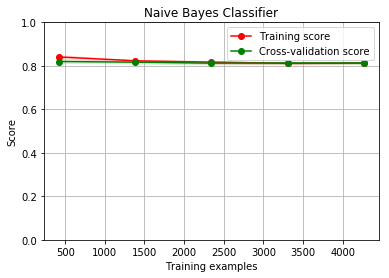

In [436]:
#Naive Bayes Classifier
nbc=GaussianNB()
nbc.fit(x_train,y_train) 
y_pred_train = nbc.predict(x_train)
y_pred_test = nbc.predict(x_test)
print('Training Accuracy {}'.format(nbc.score(x_train, y_train)))
print('Training Confusion = {}'.format(metrics.confusion_matrix(y_pred_train, y_train, [1,2])))
print(classification_report(y_train, y_pred_train))
print('========================================================')
print('Test Accuracy {}'.format(nbc.score(x_test, y_test)))
print('Test Confusion = {}'.format(metrics.confusion_matrix(y_pred_test, y_test, [1,2])))
print(classification_report(y_test, y_pred_test))
plot_learning_curve(nbc,"Naive Bayes Classifier", x_train, y_train, ylim=(0,1),cv=5)
#print(accuracy_score(y_train, , normalize=True, sample_weight=None))
joblib.dump(nbc,'nbcwt.joblib')